
# <font color=#770000>ICPE 639 Introduction to Machine Learning </font>

## ------ With Energy Applications

Some of the examples and exercises of this course are based on several books as well as open-access materials on machine learning, including [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)


<p> &#169; 2021: Xiaoning Qian </p>

[Homepage](http://xqian37.github.io/)

**<font color=blue>[Note]</font>** This is currently a work in progress, will be updated as the material is tested in the class room.

All material open source under a Creative Commons license and free for use in non-commercial applications.

Source material used under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

# Kernel ridge regression and Gaussian process regression

This section will cover the content listed below: 

- [1 Kernel Ridge Regression](#1-Kernel-Ridge-Regression)
- [2 **Machine Learning Evaluation**](#2-Performance-Evaluation)
- [3 Gaussian Process Regression](#3-Gaussian-Process-Regression)
- [4 Hands-on Exercise](#4-Exercise)
- [Reference](#Reference)


In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

%matplotlib inline
warnings.filterwarnings('ignore')

## 1 Kernel Ridge Regression

### 1.1 Introduction

Kernel ridge regression is a non-parameteric form of ridge regression with the aim of learning a function in the space induced by the respective kernel $K(\cdot, \cdot)$ by minimizing a squared loss with a squared norm regularization term. 



Recall the *ridge linear regression* with the objective function is defined as following, 

$$\min\sum_{i=1}^n(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij})^2 + \lambda\sum_{j=1}^p\beta_j^2,$$
where $\lambda$ is a tuning parameter that controls the strength of the penalty. 




Now we consider the model of form $$y = f(x) + \epsilon$$ and estimate $f$ by solving an optimization problem over 

$$\hat{f} = \text{argmin}_{f\in\mathcal{H}}\frac{1}{2}\sum_{i=1}^n(y_i - f(x_i))^2 + \frac{\lambda}{2}||f||_{\mathcal{H}}^2$$

**Representer Theorem**: Let $\Omega:[0,+\infty)\rightarrow\mathbb{R}$ be strictly increasing and let $\ell: (X\times Y\times \mathbb{R})^n\rightarrow \mathbb{R} \cup \{+\infty\}$ be a loss function. Consider
\
$$\min_{f\in\mathcal{H}}\ell(x_{i},y_{i}, f(x_{i})) + \lambda_n \Omega(||f||_{\mathcal{H}}^2)$$
where $\mathcal{H}$ is an RKHS with kernel $K$. Then any optimal solution has the following form: 
\
$$f(\cdot) = \sum_i^n \alpha_iK(\cdot, x_{i})$$




Therefore, any solution of $\hat{f}(\cdot)$ takes the form 
$$\hat{f} = \sum_{i=1}^n\alpha_i K(\cdot, x_j), K_{ij} =K (x_i, x_j).$$ 

We can obtain the following equivalent problem:
$$\hat{\alpha} = \text{argmin}_{\alpha \in\mathbb{R}^n}\frac{1}{2}||y-\mathbf{K}\alpha||_2^2+\frac{\lambda}{2}\alpha^T\mathbf{K}\alpha$$

By taking the gradient and reorganizing, we can get the closed solution of form $$\hat{\alpha} = (\mathbf{K} + \lambda I)^{-1}y$$ and this gives the estimate of $f$ as 
$$\hat{f}(\cdot) = \sum_i^n\hat{\alpha}_iK(\cdot, x_i)$$ 

### 1.2 Kernels

Suppose we are given data with $x_i$ being the inputs and $y_i$ being the targets, $$(x_1,y_1), \ldots, (x_n,y_n)\in \mathcal{X}\times \mathcal{Y}$$
In learning, we want to get a model that can be able to generalize to unseen data points, meaning that we want to choose $y$ such that $(x,y)$ is in some sense similar to the training data. A similarity measure is required, 
$$K:\mathcal{X}\times\mathcal{X}\rightarrow \mathbb{R}, (x, x') \mapsto K(x, x')$$
satisfying, for all $x, x'\in \mathcal{X}$,
$$K(x, x') = <\Phi(x), \Phi(x')>$$
where $\Phi$ maps into some feature space $\mathcal{H}$. The similarity measure $K(\cdot,\cdot)$ is called *kernel* and $\Phi$ is called its *feature map*. 



Some common choices of kernels: 

*   Radial-basis function (RBF) kernel: $$K(x_i, x_j) = \exp\left(-\frac{d(x_i, x_j)^2}{2l^2}\right)$$
*   Matern kernel: $$K(x_i, x_j) = \frac{1}{\Gamma(\nu)2^{\nu - 1}}\left(\frac{\sqrt{2\nu}}{l}d(x_i, x_j)\right)^{\nu}K_{\nu}\left(\frac{\sqrt{2\nu}}{l}d(x_i, x_j)\right),$$ 
where $\Gamma$ and $K_{\nu}$ are Gamma and Bessel functions respectively. 
*   Absolute exponential kernel: (Matern kernel with $\nu = 1/2$) $$K(x_i, x_j) = \exp{\left(-\frac{d(x_i,x_j)}{l}\right)}$$
*   Rational quadratic kernel: $$K(x_i, x_j) = \left(1 + \frac{d(x_i, x_j)^2}{2\alpha l^2}\right)^{-\alpha}$$

### 1.3 Example
We generate a dataset with 21 points in which $y$ is calculated as following 
$$y = (x + 4) \cdot (x + 1) \cdot (x - 1)\cdot (x-3) + runif(-1, 1)$$

In [ ]:
import random
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# initialize lists and set random seed
x = []
y = []
random.seed(2021)

for i in range(-10, 11):
    xi = i/2
    err = random.uniform(-1, 1)
    yi = (xi + 4) * (xi + 1) * (xi - 1) * (xi - 3) + err
    x.append(xi)
    y.append(yi)

x_pred = np.arange(-5, 5, 0.1).reshape(-1, 1)
x = np.array(x).reshape(-1, 1)

In [ ]:
# simple linear regression
regr = LinearRegression()
regr.fit(x, y)
y_fit_regr = regr.predict(x)
y_pred_regr = regr.predict(x_pred)

# ridge regression
ridge_regr = Ridge(alpha = 1.0)
ridge_regr.fit(x,y)
y_fit_rg = ridge_regr.predict(x)
y_pred_rg = ridge_regr.predict(x_pred)

# random select a degree for polynomial example
degree_value = 3  #4
krr = KernelRidge(alpha = 1.0, kernel='polynomial', degree=degree_value)
krr = krr.fit(x, y)
y_pred_krr = krr.predict(x_pred)
y_fit_krr = krr.predict(x)

# Print rmse value
rmse_lr = np.sqrt(mean_squared_error(y_fit_regr, y))
rmse_rg = np.sqrt(mean_squared_error(y_fit_rg, y))
rmse_krr = np.sqrt(mean_squared_error(y_fit_krr, y))
    
print('############ Simple Linear Model ##############')
print('Root Mean Squared Error: %.5f\n' % rmse_lr)

print('############# Ridge Regression ################')
print('Root Mean Squared Error: %.5f\n' % rmse_rg)

print('########## Kernel Ridge Regression ############')
print('Degree:', degree_value)
print('Root Mean Squared Error: %.5f' % rmse_krr)

############ Simple Linear Model ##############
Root Mean Squared Error: 104.08563

############# Ridge Regression ################
Root Mean Squared Error: 104.08591

########## Kernel Ridge Regression ############
Degree: 3
Root Mean Squared Error: 56.14879


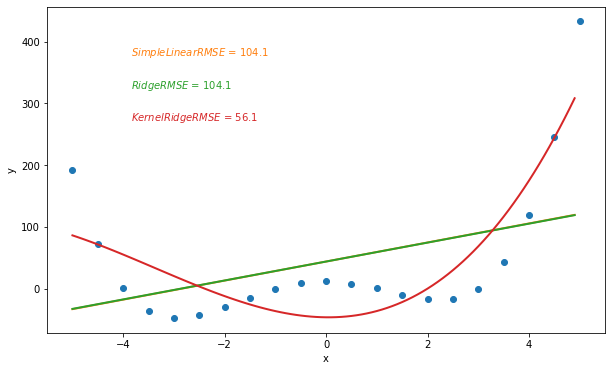

In [ ]:
# Set axes and labels
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot()

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.annotate(u'$Simple Linear RMSE$ = %.1f' % rmse_lr, xy=(0.15,0.85), xycoords='axes fraction', color = 'C1')
ax.annotate(u'$Ridge RMSE$ = %.1f' % rmse_rg, xy=(0.15,0.75), xycoords='axes fraction', color = 'C2')
ax.annotate(u'$Kernel Ridge RMSE$ = %.1f' % rmse_krr, xy=(0.15,0.65), xycoords='axes fraction', color = 'C3')

# Plot as blue points the original database
plt.scatter(x, y,color='C0')

# Plot as orange line the regression line at interval
plt.plot(x_pred, y_pred_regr, color = 'C1', linestyle ='solid', linewidth = 2)
plt.plot(x_pred, y_pred_rg, color = 'C2', linestyle ='solid', linewidth = 2)
plt.plot(x_pred, y_pred_krr, color = 'C3', linestyle ='solid', linewidth = 2)

plt.show()

## 2 Performance Evaluation

One important part of developing machine learning methods is to make sure that the learned model not only performs well in the training data but also generalizes well to the **unseen new data**. The introduced metrics based on residuals for regression can be used to evaluate the model as error on the training data (**resubstitution**, which is often over-optimisitic). However, it does not provide the information of how well this model will do in prediction for unseen data. Depending on the availability of the training data, there are different evaluation strategies.

### 2.1 Hold-out 

Hold-out evaluation is to split the available data into nonoverlapping "training" and "test" data. The latter test data are held out when learning models and serve as "unseen" data to evaluate the generalizability of the learned model. 



### 2.2 Leave-$n$-out 

Leave-$n$-out is to use $n$ observations as the test data and the remaining as the training data, and it's repeated all the way to split the entire dataset (training and validation $C_N^n$ times). 




### 2.3 Cross Validation

Cross validation (CV) is another evaluation strategy and it is also used for model selection or hyperparameter tuning often. The following is the procedure of k-fold cross-validation: \\
    1. Shuffle the dataset randomly. \\
    2. Split the dataset into k groups. \\
    3. Take one group as a hold out or validation set and the remaining groups as a training data set. Fit a model on the training set and evaluate it on the validation set. Retain the evaluation score and discard the model. \\
    4. Summarize based on the sample mean of k model evaluation scores.
    
### 2.4 Bootstrap (CV by sampling with replacement) 

### 2.5 Other advanced error estimators

## 3 Gaussian Process Regression

**Gausian processes** are Bayesian superivsed learning models designed to solve regression and probabilistic classification problems. 

### 3.1 Introduction

**Bayesian linear regression** The Bayesian approach infers a probability distribution over all possible values. Assume the linear function as follows, 
$$\mathbf{y} = \mathbf{w}\mathbf{x} + \boldsymbol{\epsilon}$$

The Bayesian approach specifies a *prior* distribution $p(\mathbf{w})$ on the parameter $\mathbf{w}$ and update probabilities (*posterior*) based on the observed data using Bayes' Rule:
$$p(\mathbf{w}|\mathbf{y}, \mathbf{x}) = \frac{p(\mathbf{y}|\mathbf{x},\mathbf{w})p(\mathbf{w})}{p(\mathbf{y}|\mathbf{x})}$$

To get the predictions at unseen points of interest $\mathbf{x}^*$, the *posterior predictive* distribution can be calculated by weighting all possible predictions by the *posterior* distribution: 
$$p(f^*|\mathbf{x}^*, \mathbf{y},\mathbf{x}) = \int_{\mathbf{w}}p(f^*|x^*, w)p(w|y, x)$$


In **GPR**, we first assume a Gaussian process prior through the mean and covariance function, like an infinite-dimensional multivariate Gaussian distribution. (The prior mean is usually assumed to be constant. The prior covariance is specified through a kernel object. )

$$f(x)\sim GP(m(x), k(x, x'))$$
$$y\sim GP(m(x), k(x, x') + \delta_{ij}\sigma^2), \text{ where }y = f(x) + \epsilon, \epsilon \sim N(0, \sigma^2)$$

From the Gaussian process prior, the collection of training and test data points are joint multivariate Gaussian distributed, so the joint distribution can be written as 
$$\left[\begin{array}{c}
y\\
f^*
\end{array}\right]\sim \mathcal{N}\left(\boldsymbol{\mu}^*, \boldsymbol{\Sigma}^*\right)$$
where
$$\boldsymbol{\mu}^* = [\boldsymbol{\mu}, \mu^*], \boldsymbol{\Sigma^*} = \left[\begin{array}{cc}
K(X, X)+\sigma^2 I & K(X, x^*)\\
K(x^*, X) & K(x^*, x^*)\end{array}\right].$$

Based on the computation of corresponding conditional and marginal distribution functions from this joint distribution, we can derive $p(f^*|\mathbf{x}^*; X, y)$ for GPR. 



The advantages of Gaussian processes are:
* The prediction interpolates the observations (at least for regular kernels).
* The prediction is probabilistic (Gaussian) so that one can compute empirical confidence intervals and decide based on those if one should refit the prediction in some region of interest.
* Different kernels can be specified. 

The disadvantages of Gaussian processes include:

* They are not sparse, i.e., they use the whole samples/features information to perform the prediction.
* They lose efficiency in high dimensional spaces – namely when the number of features exceeds a few dozens.




### 3.2 Example
Generate $X$ by take 10 values evenly from $[0, 10]$ and generate $$Y = Xsin(X) + cos(7\pi X) + \frac{3}{(X+1)^2}。$$ Five different kernel functions are considered and cross-validation is used to select the best model. 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared

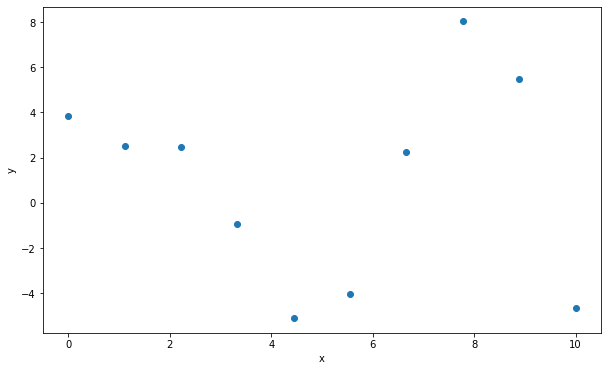

In [ ]:
rng = np.random.RandomState(1)
X = np.linspace(0, 10, 10)
y = X * np.sin(X) + np.cos(7 * np.pi * X) + 3 * (1/(X+1)) ** 2
dy = 0.5 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise
# GaussFeats = GaussianFeatures(10).fit_transform(x.reshape(-1, 1))

plt.figure(figsize = (10, 6))
# plt.subplot(1,2,1)
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [ ]:
x = np.linspace(0, 12, 50)

ker_rbf = RBF(1.0)
ker_rq = RationalQuadratic(alpha=0.1, length_scale=1)
ker_expsine = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))
ker_matern1 = Matern(nu = 2.5)
ker_matern2 = Matern(nu = 1.5)

kernel_list = [ker_rbf, ker_rq, ker_expsine, ker_matern1, ker_matern2]

param_grid = {"kernel": kernel_list,
              "n_restarts_optimizer": [1, 10, 50]}

print("\nRunning grid search to tune up GPR parameters")
gp = GaussianProcessRegressor()
grid = GridSearchCV(gp, param_grid=param_grid, scoring = 'r2')
grid.fit(X.reshape(-1, 1), y)


Running grid search to tune up GPR parameters


GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                                                kernel=None,
                                                n_restarts_optimizer=0,
                                                normalize_y=False,
                                                optimizer='fmin_l_bfgs_b',
                                                random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': [RBF(length_scale=1),
                                    RationalQuadratic(alpha=0.1, length_scale=1),
                                    ExpSineSquared(length_scale=1, periodicity=5),
                                    Matern(length_scale=1, nu=2.5),
                                    Matern(length_scale=1, nu=1.5)],
                         'n_restarts_optimizer': [1, 10, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fal

In [ ]:
# print the selected model
print(grid.best_estimator_)

# print best parameter after tuning
print(grid.best_params_)

# print the best score
print(grid.best_score_)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RBF(length_scale=1), n_restarts_optimizer=50,
                         normalize_y=False, optimizer='fmin_l_bfgs_b',
                         random_state=None)
{'kernel': RBF(length_scale=1), 'n_restarts_optimizer': 50}
-17.49345186053682


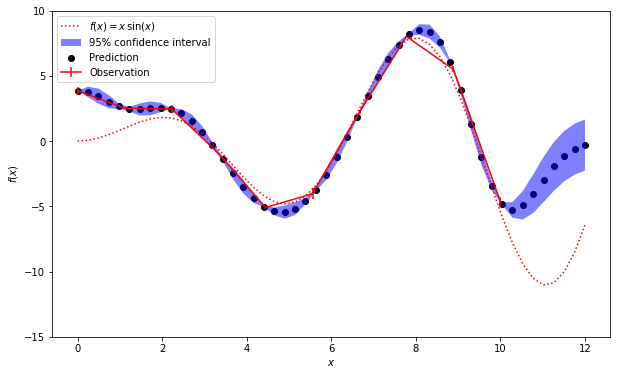

In [ ]:
# Make the prediction on the testing dataset (ask for MSE as well)
gp = grid.best_estimator_
gp.fit(X.reshape(-1, 1), y)
y_pred, sigma = gp.predict(x.reshape(-1, 1), return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure(figsize=(10,6))
plt.plot(x, x * np.sin(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.scatter(x, y_pred, color = 'black', label='Prediction')
plt.errorbar(X, y, dy, label = 'Observation', color = 'red')
plt.fill(np.concatenate([x.reshape(-1, 1), x.reshape(-1, 1)[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-15, 10)
plt.legend(loc='upper left')

plt.show()

### 3.3 A real-world data example

The data relates to an inverse dynamics problem for a seven degrees-of-freedom SARCOS anthropomorphic robot arm. The task is to map from a 21-dimensional input space (7 joint positions, 7 joint velocities, 7 joint accelerations) to the corresponding 7 joint torques. Following previous work we present results for just one of the seven mappings, from the 21 input variables to the first of the seven torques. The training data is of size $44484 \times 28$ and the test data is of size $4449 \times 28$. 
The first 21 columns are the input variables, and the 22nd column is used as the target variable. 

In [ ]:
training_data = pd.read_csv('https://raw.githubusercontent.com/XiaomengYan/MachineLearning_dataset/main/sarcos_inv.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/XiaomengYan/MachineLearning_dataset/main/sarcos_inv_test.csv')

X_train = training_data.iloc[:100, 1:22]
y_train = training_data.iloc[:100, 22]
X_test = test_data.iloc[:, 1:22]
y_test = test_data.iloc[:, 22]

In [ ]:
# Instantiate a Gaussian Process model and use the cross-validation to select the best model
print("\nRunning grid search to tune up GPR parameters")
gp = GaussianProcessRegressor()
grid = GridSearchCV(gp, param_grid=param_grid, scoring = 'r2')
best = grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print the selected model
print(grid.best_estimator_)


Running grid search to tune up GPR parameters
{'kernel': RationalQuadratic(alpha=0.1, length_scale=1), 'n_restarts_optimizer': 10}
GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RationalQuadratic(alpha=0.1, length_scale=1),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)


In [ ]:
means = best.cv_results_['mean_test_score']
params = best.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>-0.186 with: {'kernel': RBF(length_scale=1), 'n_restarts_optimizer': 1}
>-0.186 with: {'kernel': RBF(length_scale=1), 'n_restarts_optimizer': 10}
>-0.186 with: {'kernel': RBF(length_scale=1), 'n_restarts_optimizer': 50}
>0.631 with: {'kernel': RationalQuadratic(alpha=0.1, length_scale=1), 'n_restarts_optimizer': 1}
>0.631 with: {'kernel': RationalQuadratic(alpha=0.1, length_scale=1), 'n_restarts_optimizer': 10}
>0.631 with: {'kernel': RationalQuadratic(alpha=0.1, length_scale=1), 'n_restarts_optimizer': 50}
>nan with: {'kernel': ExpSineSquared(length_scale=1, periodicity=5), 'n_restarts_optimizer': 1}
>nan with: {'kernel': ExpSineSquared(length_scale=1, periodicity=5), 'n_restarts_optimizer': 10}
>-1.432 with: {'kernel': ExpSineSquared(length_scale=1, periodicity=5), 'n_restarts_optimizer': 50}
>0.488 with: {'kernel': Matern(length_scale=1, nu=2.5), 'n_restarts_optimizer': 1}
>0.488 with: {'kernel': Matern(length_scale=1, nu=2.5), 'n_restarts_optimizer': 10}
>0.488 with: {'kernel': Ma

In [ ]:
gp = grid.best_estimator_
gp.fit(X_train, y_train)

# Make the prediction on the testing dataset (ask for MSE as well)
y_pred, sigma = gp.predict(X_test, return_std=True)

MSE_test = np.mean(np.power(y_pred - y_test, 2))
print("MSE for the test set by GPR: ", MSE_test)

# Linear & Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred_lr = regr.predict(X_test)

MSE_test = np.mean(np.power(y_pred_lr - y_test, 2))
print("MSE for the test set by linear model: ", MSE_test)

ridge_regr = Ridge(alpha = 2.0)
ridge_regr.fit(X_train,y_train)
y_pred_rg = ridge_regr.predict(X_test)

MSE_test = np.mean(np.power(y_pred_rg - y_test, 2))
print("MSE for the test set by Ridge model: ", MSE_test)

MSE for the test set by GPR:  268.42303033594055
MSE for the test set by linear model:  711519.7547611253
MSE for the test set by Ridge model:  246.41148282513623


## 4 Hands-on Exercise

The same dataset `Auto` in the last module is used here. It has 392 observations with 9 variables: 

- `mpg`: miles per gallon
- `cylinders`: Number of cylinders between 4 and 8
- `displacement`: Engine displacement
- `horsepower`: Engine horsepower
- `weight`: Vehicle weight(lbs)
- `acceleration`: Time to accelerate from 0 to 60 mph (sec.)
- `year`: Model year
- `origin`: Origin of car (1. American, 2. European, 3. Japanese)
- `name`: Vehicle name

(a) Load the dataset and preprocessing the data

In [ ]:
auto = pd.read_csv('https://raw.githubusercontent.com/XiaomengYan/MachineLearning_dataset/main/Auto.csv', na_values='?').dropna()
auto.info()
auto.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


(b) Perform kernel ridge regression and Gaussian process regression with mpg as the response, displacement, horsepower, weight and acceleration as the predictors. Use cross-validation to select the suitable model. Calculate the MSE and $R^2$ based on the selected model. Comment on the result. 

In [ ]:
y = auto.mpg.to_numpy().reshape(-1, 1)
X = auto[["displacement", "horsepower", "weight", "acceleration"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [ ]:
params_grid = {
    'alpha': [0.1, 1.0, 10],
    'degree': [1, 2, 3],
}
krr = KernelRidge(kernel='polynomial')
grid = GridSearchCV(krr, params_grid, scoring = "r2", cv = 5, refit = True)
grid.fit(X_train, y_train)

# print the selected model
print(grid.best_estimator_)

# print best parameter after tuning
print(grid.best_params_)

# print the best score
print(grid.best_score_)

KernelRidge(alpha=0.1, coef0=1, degree=1, gamma=None, kernel='polynomial',
            kernel_params=None)
{'alpha': 0.1, 'degree': 1}
0.7100513474098523


In [ ]:
krr = grid.best_estimator_
krr.fit(X_train,y_train)

y_krr = krr.predict(X_test)
MSE_krr = np.mean(np.power(y_krr - y_test, 2))
r2_krr = r2_score(y_test, y_krr)
print("MSE given by the selected kernel ridge regression: ", MSE_krr)
print("r2 given by the selected kernel ridge regression: ", r2_krr)

MSE given by the selected kernel ridge regression:  19.181246391990875
r2 given by the selected kernel ridge regression:  0.6415475234678001


In [ ]:
gp = GaussianProcessRegressor()
grid = GridSearchCV(gp, param_grid=param_grid, scoring = 'r2', cv = 5)
best = grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print the selected model
print(grid.best_estimator_)

gp = grid.best_estimator_
gp.fit(X_train, y_train)
y_gp = gp.predict(X_test)
MSE_gp = np.mean(np.power(y_gp - y_test, 2))
r2_gp = r2_score(y_test, y_gp)
print("MSE given by the selected Gaussian process regression: ", MSE_gp)
print("r2 given by the selected Gaussian process regression: ", r2_gp)

{'kernel': RationalQuadratic(alpha=0.1, length_scale=1), 'n_restarts_optimizer': 1}
GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RationalQuadratic(alpha=0.1, length_scale=1),
                         n_restarts_optimizer=1, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)
MSE given by the selected Gaussian process regression:  19.462746029191333
r2 given by the selected Gaussian process regression:  0.6362869559303561


## Reference

* [Notes for kernel ridge regression by Max Welling](https://www.ics.uci.edu/~welling/classnotes/papers_class/Kernel-Ridge.pdf)
* [scikit-learn user guide for Kernel ridge regression](https://scikit-learn.org/stable/modules/kernel_ridge.html)
* [scikit-learn user guide for Gaussian Process](https://scikit-learn.org/stable/modules/gaussian_process.html)
* [Gaussian Process for Machine Learning](http://gaussianprocess.org/gpml/)
* [A Visual Exploration of Gaussian Processes](https://distill.pub/2019/visual-exploration-gaussian-processes/)

# Questions? 

In [ ]:
Image(url= "https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png", width=100)